In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Load the Dataset
file_path = "../preprocessed_data/Premier_League_Data_outfield_processed.csv"  
df = pd.read_csv(file_path)

# Prepare features and target
X = df.drop(columns=["Player", "player_market_value_euro"], errors="ignore")  
y = df["player_market_value_euro"]

# Split Data into Training and Testing Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt']
}

# Create RandomizedSearchCV object
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)


# Fit the random search
print("Performing random search...")
rf_random.fit(X_train, y_train)

# Get best parameters and score
print("\nBest parameters found:")
print(rf_random.best_params_)
print(f"Best cross-validation score: {np.sqrt(-rf_random.best_score_):.2f}")

# Use the best model for predictions
best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)


Performing random search...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters found:
{'max_depth': 49, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 228}
Best cross-validation score: 0.76


/Users/philipleong/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/philipleong/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/philipleong/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/philipleong/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_c


📊 Model Performance Metrics:
📌 Mean Absolute Error (MAE): 0.50
📌 Mean Squared Error (MSE): 0.42
📌 Root Mean Squared Error (RMSE): 0.65
📌 Mean Absolute Percentage Error: 2.95
📌 R² Score: 0.29


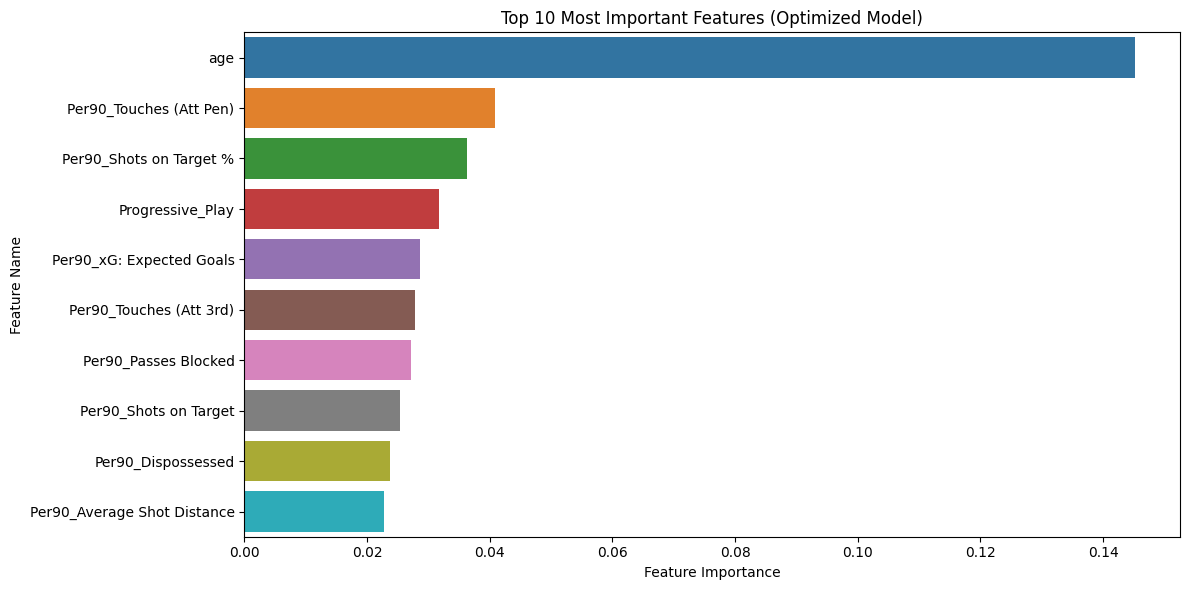


🔍 Top 10 Most Important Features:
                        feature  importance
44                          age    0.145281
37      Per90_Touches (Att Pen)    0.040827
34      Per90_Shots on Target %    0.036295
47             Progressive_Play    0.031674
43     Per90_xG: Expected Goals    0.028660
36      Per90_Touches (Att 3rd)    0.027756
23         Per90_Passes Blocked    0.027251
33        Per90_Shots on Target    0.025347
8            Per90_Dispossessed    0.023814
3   Per90_Average Shot Distance    0.022825

CV Results Summary:
   mean_test_score  std_test_score  rank_test_score
0        -0.623068        0.104725               43
1              NaN             NaN               58
2              NaN             NaN               58
3        -0.626990        0.119949               48
4        -0.601339        0.081982               14
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=117; total time=   0.1s
[CV] END max_depth=26, max_

In [2]:

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Calculate MAPE
rmse = np.sqrt(mse)


print(f"\n📊 Model Performance Metrics:")
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 Mean Absolute Percentage Error: {mape:.2f}")
print(f"📌 R² Score: {r2:.2f}")

# Feature Importance using the best model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Optimized Model)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\n🔍 Top 10 Most Important Features:")
print(feature_importance.head(10))

# Print the CV results
cv_results = pd.DataFrame(rf_random.cv_results_)
print("\nCV Results Summary:")
print(cv_results[['mean_test_score', 'std_test_score', 'rank_test_score']].head())